In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [61]:
df = pd.read_csv("apple_quality.csv")
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [2]:
pd.read_csv()

AttributeError: module 'pandas' has no attribute 'read'

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [63]:
df.drop(df.index[-1], inplace=True)
df["Acidity"] = df["Acidity"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [64]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


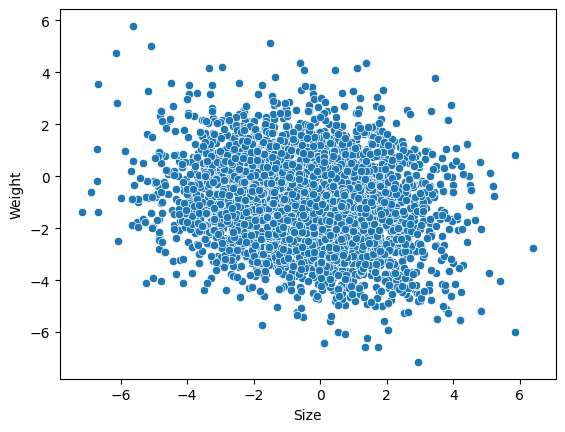

In [65]:
sns.scatterplot(df, x="Size", y="Weight")
plt.show()

In [66]:
good_apples = df[df["Quality"] == "good"]
bad_apples = df[df["Quality"] == "bad"]

In [67]:
x = good_apples[["Size"]]  
y = good_apples["Weight"]

lin_reg_GA = LinearRegression()
lin_reg_GA.fit(x, y)

xgb_reg_GA = XGBRegressor()
xgb_reg_GA.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

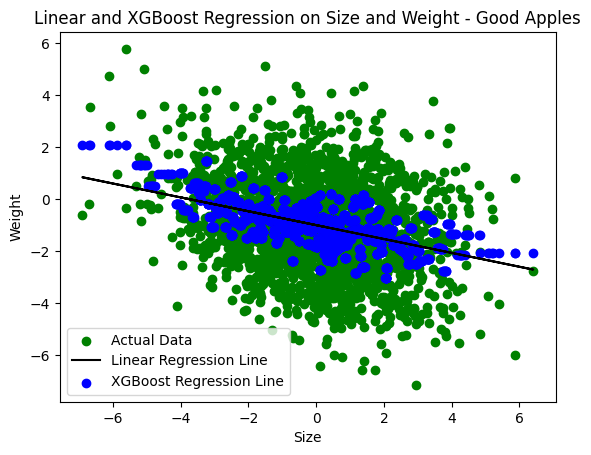

In [68]:
predictions_lin = lin_reg_GA.predict(x)
predictions_xgb = xgb_reg_GA.predict(x)

# Plot the data points and the linear regression line
plt.scatter(x, y, label="Actual Data", color="green")
plt.plot(x, predictions_lin, color="black", label="Linear Regression Line")
plt.scatter(x, predictions_xgb, color="blue", label="XGBoost Regression Line")
plt.xlabel("Size")
plt.ylabel("Weight")
plt.title("Linear and XGBoost Regression on Size and Weight - Good Apples")
plt.legend()
plt.show()


In [69]:
x = bad_apples[["Size"]] 
y = bad_apples["Weight"]

lin_reg_BA = LinearRegression()
lin_reg_BA.fit(x, y)

xgb_reg_BA = XGBRegressor()
xgb_reg_BA.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

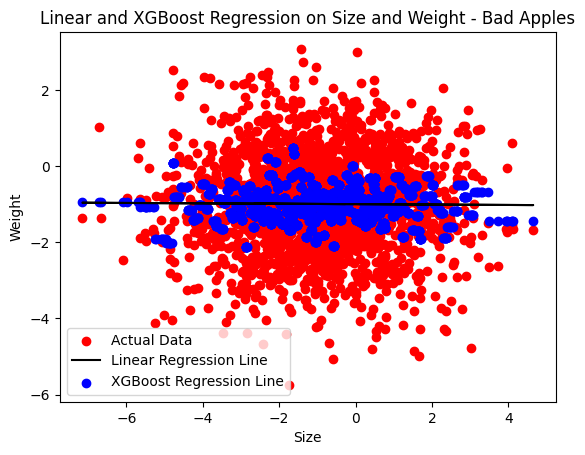

In [70]:
predictions_lin = lin_reg_BA.predict(x)
predictions_xgb = xgb_reg_BA.predict(x)

# Plot the data points and the linear regression line
plt.scatter(x, y, label="Actual Data", color="red")
plt.plot(x, predictions_lin, color="black", label="Linear Regression Line")
plt.scatter(x, predictions_xgb, color="blue", label="XGBoost Regression Line")
plt.xlabel("Size")
plt.ylabel("Weight")
plt.title("Linear and XGBoost Regression on Size and Weight - Bad Apples")
plt.legend()
plt.show()

In [71]:
features = df.columns[0:-1]
target = df.columns[-1]

label_encoder = LabelEncoder()

df[target] = label_encoder.fit_transform(df[target])


In [72]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)

In [73]:
xgb_classifier = XGBClassifier()
xgb_rf_classifier = XGBRFClassifier()
nn_classifier = MLPClassifier(solver="adam", 
                              alpha=1e-5,
                              max_iter=1000,
                              hidden_layer_sizes=(10, 5),
                              verbose=True)


xgb_classifier.fit(x_train, y_train)
xgb_rf_classifier.fit(x_train, y_train)
# nn_classifier.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [75]:
param_grid = {
    "solver": ["lbfgs", "sgd", "adam"],
    "hidden_layer_sizes": [(5, 2), (10, 5), (20, 10)],
    "alpha": [1e-5, 1e-4, 1e-3],
    "max_iter": [300, 600, 1000],
    "activation": ["relu", "tanh", "logistic"]
}
# Create the MLPClassifier
nn_classifier = MLPClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(nn_classifier, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'solver': 'lbfgs'}
Best Accuracy: 0.7964285714285715
Test Accuracy of the Best Model: 0.7708333333333334


/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [76]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'solver': 'lbfgs'}
Best Accuracy: 0.7964285714285715
Test Accuracy of the Best Model: 0.7708333333333334


In [ ]:
accuracy_xgb = xgb_classifier.score(x_test, y_test) * 100.0
print(f"Accuracy of the XGBoost Classifier: {accuracy_xgb:.2f}%")

# Evaluate and print accuracy for the second classifier
accuracy_xgb_rf = xgb_rf_classifier.score(x_test, y_test) * 100.0
print(f"Accuracy of the XGBoost Random Forest Classifier: {accuracy_xgb_rf:.2f}%")

print(f"Accuracy of the MLP Classifier: {test_accuracy*100.0:.2f}%")

Accuracy of the XGBoost Classifier: 88.33%
Accuracy of the XGBoost Random Forest Classifier: 84.83%
Accuracy of the MLP Classifier: 66.42%
